# 強束縛模型による電子状態の計算
物理・化学の分野では、分子や結晶の電子状態がさまざまな議論の基本になっています。スーパーコンピュータを使ってシュレディンガー方程式や、それを電子密度の関数に焼き直したコーン・シャム方程式というものを解析してシミュレーションする第一原理計算などが挙げられます。こういったシミュレーション手法は非経験的なシミュレーション手法と呼ばれ、実験結果などのパラメータを使わずに電子状態を計算できる利点がありますが、計算コストは高くプログラミングも数万行に及びます。

一方で、経験的な計算手法として、実験結果や第一原理計算から求めたパラメータを用いて電子状態の計算を行う方法が挙げられます。これは複雑な計算からシンプルなものまでバリエーションに富んでいますが、もっともシンプルなものの一つが強束縛法（LCAO法）です。今回はこのLCAO法をつかって、グラフェンの電子状態を計算してみましょう。

## バンド分散
今回計算しようと思うのは、バンド分散です。「バンド」というものに馴染みが無いかもしれないので、まずそれを簡単に紹介します。
物性物理や無機化学で扱う大概の物質は結晶になっています。結晶になっているということは、周期性があるということで、その中の電子状態にもこの周期性が現れます。それを端的にあらわしているのがBlochの定理です。

表記がめんどうなので、ひとまず1次元系を考えます。電子のシュレディンガー方程式
$$
(\frac{-\hbar^2 \nabla^2 }{2m}+V(r)) \psi= E\psi
$$
で$V(r)$が周期ポテンシャルであるとしましょう。すなわち格子ベクトルR分進むともとに戻る$V(R+r)=V(r)$という状況です。固有状態は、格子ベクトルRすすんだら同じ値に戻るとは限りませんが、一定の条件を満たす必要があります。これがBlochの定理で、
$$
\psi(R+r)=e^{ik\cdot r}\psi(r)
$$
となることが知られています。ｋは波数で、固有状態の持つ波長の逆数に対応します。Blochの定理に基づいて、結晶での電子状態を、波数に依存したブロッホ状態で記述することができます。
$$
\psi_{k}(r)=e^{ik\cdot r}u_{k}(r) \\
u_{k}(r+R)=u_{k}
$$
ブロッホ状態のシュレディンガー方程式を考えると
$$
H\psi_{k}(r)=E_k\psi_{k}(r)
$$
となり、波数に依存した固有値を考えることができます。この波数と固有値の関係をプロットしたものがバンド分散やバンド図と呼ばれるものです。


LCAO法ではこのブロッホ状態が近似的に原子軌道に位相をかけたものの線形結合で表されるとします。
$$
\psi=\sum_{i} c_i(k)\phi_i(k,r) \\
\phi_i(k,r) =\frac{1}{\sqrt{N}}\sum_{t_n} e^{ik\cdot t_n}\phi_i(r-t_n)
$$


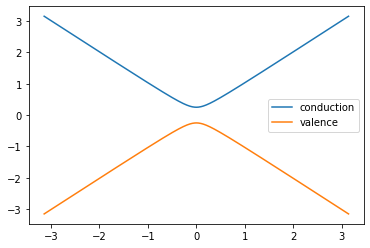

In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np

def H(kx,ky,delta):
    ham=[[delta/2.0, kx-ky*1.0j],[kx+ky*1.0j, -delta/2.0]]
    return ham

eigenv=[]
eigenc=[]

path=np.linspace(-math.pi, math.pi, 500);
deltak=0.001

gap=0.5
for kpt in path:
    
    ham=H(kpt,0.0,gap)
    eig, l=np.linalg.eig(ham)
    
    eigenc.append(eig[0].real)
    eigenv.append(eig[1].real)
 

plt.plot(path,eigenc,label="conduction")
plt.plot(path,eigenv,label="valence")
plt.legend()
plt.show() 

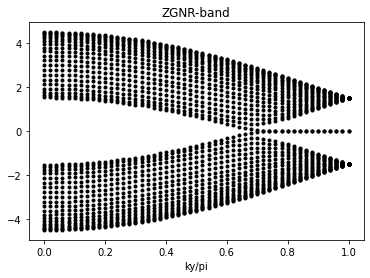

In [4]:
import numpy
import math
import matplotlib.pyplot as plt
#zigzag nanoribbon
'calculate band dispersion along Gamma Y'
sample=51
t=1.5

modelsize=20

kpoint=numpy.linspace(0,1,sample)

tot=[]

for ky in kpoint:
    
    kya=ky*math.pi
    '2x2 matrix for upper'
    upper=[[0.0, t],
            [0.0, 0.0]
            ]
    '2x2 matrix for lower'
    lower=[[0.0, 0.0],
            [t, 0.0]
            ]
    '2x2 matrix for other diagonal block'
    diag=[[0.0, t*2.0*math.cos(kya/2.0)],
            [t*2.0*math.cos(kya/2.0), 0.0]
            ]
    
    'fill the matrix'
    matrix=numpy.zeros(((modelsize)*2,(modelsize)*2))
    
    for i in range(modelsize):
        for j in range(modelsize):
            if j==i:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=diag
            elif j==i-1:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=upper
            elif j==i+1:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=lower
                
                    
    A=numpy.mat(matrix)
    #print(A)
            
    (l,v)=numpy.linalg.eig(A)
    result=[kya,l,v]
    tot.append(result)

klist=([x[0]/math.pi for x in tot])

#print(tot[0][1][2])
'plotting the band structure'

for i in range(modelsize*2):
    eigenval=[]
    for j in range(len(klist)):
        eigenval.append(tot[j][1][i].real)
    
    plt.plot(klist,eigenval,'.',color="0")

plt.xlabel("ky/pi") 
titleString="ZGNR-band"
plt.title(titleString)
plt.show()